<a href="https://colab.research.google.com/github/AdriaSoria/DL_FinalProject/blob/main/code/DL_FinalProject_(Data_Exploration).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color=CC0000> **Deep Learning**
## <font color=CC0000> **Final Project: Energy Consumption Prediction**

**P103 - Team L**

*   Adrià Soria - 251729
*   Judit Viladecans - 251437
*   Paula Ceprián - 252503

## **0. Introduction**

In this notebook, we perform exploratory data analysis and preparation steps on the `household_power_consumption.txt` dataset. The dataset contains individual household electric power consumption measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Our focus here is to:
- **Load and clean the dataset** (handle missing values, data types, and time formats).
- Generate and **interpret visualizations** to understand daily and seasonal energy usage trends.
- **Prepare a cleaned and resampled version of the dataset**, ready for future modeling tasks.


This structured approach ensures a comprehensive analysis of the data and lays the foundation for the implementation of a robust prediction model.

# 1. Data Gathering

### 1.1. Import Basic Libraries and Dataset
In this section, we import the essential libraries for data manipulation and visualization. The `household_power_consumption.txt` dataset is loaded to kickstart our analysis.



In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
project_path = '/content/drive/Shareddrives/Deep Learning 2025/UPF_Deep_Learning_2025/Project/' #Change path to your dataset location

os.chdir(project_path)

Mounted at /content/drive


In [ ]:
# Step 1: Load the dataset with proper parsing
df = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    header=0,
    low_memory=False,
    na_values='?',  # Convert '?' to NaN
    names=['Date','Time','Global Active Power','Global Reactive Power','Voltage','Global Intensity','Sub Metering 1','Sub Metering 2','Sub Metering 3']
)

# Step 2: Combine 'Date' and 'Time' into one datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Step 3: Reorder columns to put 'Datetime' first
num_cols = [col for col in df.columns if col not in ['Datetime', 'Date', 'Time']]
all_cols = ['Datetime', 'Date', 'Time'] + num_cols
df = df[all_cols]

# Step 4: Convert remaining columns to float
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.head(300)

,Datetime,Date,Time,Global Active Power,Global Reactive Power,Voltage,Global Intensity,Sub Metering 1,Sub Metering 2,Sub Metering 3
0,2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
295,2006-12-16 22:19:00,2006-12-16,22:19:00,2.350,0.000,238.59,9.8,0.0,0.0,0.0
296,2006-12-16 22:20:00,2006-12-16,22:20:00,2.428,0.068,238.87,10.0,0.0,0.0,0.0
297,2006-12-16 22:21:00,2006-12-16,22:21:00,2.078,0.072,238.97,9.2,0.0,0.0,0.0
298,2006-12-16 22:22:00,2006-12-16,22:22:00,0.780,0.090,239.93,4.6,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Date                   datetime64[ns]
 2   Time                   object        
 3   Global Active Power    float64       
 4   Global Reactive Power  float64       
 5   Voltage                float64       
 6   Global Intensity       float64       
 7   Sub Metering 1         float64       
 8   Sub Metering 2         float64       
 9   Sub Metering 3         float64       
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


As shown in the previous summary table, the dataset consists of over 2 million rows and 10 columns, making it a large-scale dataset that is well-suited for further data analysis and deep learning models.

Initially, all columns were read as object data types, which is not optimal for numerical or time-series analysis. To address this, the `Date` and `Time` columns were combined and converted into a single datetime column, and the remaining features were converted into numerical (`float64`) types, as they represent continuous values such as energy consumption and voltage.

Additionally, the dataset might contain missing values, which need to be addressed during the data cleaning stage. We will handle these by removing incomplete rows.

In [ ]:
df[num_cols].describe()

,Global Active Power,Global Reactive Power,Voltage,Global Intensity,Sub Metering 1,Sub Metering 2,Sub Metering 3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


The summary statistics table provides insights into the distribution of each numerical feature. We observe that Global Active Power has an average of about 1.09 kW but a median of only 0.60 kW, indicating a right-skewed distribution with occasional high-consumption periods. Voltage remains relatively stable around 240V, suggesting consistent supply. Global Intensity and Reactive Power follow similar patterns, with moderate means but significant upper ranges. The sub-metering features show many zero values, especially in Sub Metering 1 and 2, pointing to periods with no recorded usage. Sub Metering 3 displays higher average values and variability, indicating more frequent or consistent usage in that area.

# 2. Data Wrangling and Preparation

### 2.1. Observation and Removal of Null Values

In this section, we check for the presence of null values in the dataset, as they can impact the performance of our model. Identifying and addressing missing data is a crucial step in data preparation. In this case, as the number of null values is relatively small compared to our large dataset and the impact is minimal, we may handle them by removal. This ensures a clean and complete dataset for further analysis and modeling.

In [ ]:
df.isnull().sum()

,0
Datetime,0
Date,0
Time,0
Global Active Power,25979
Global Reactive Power,25979
Voltage,25979
Global Intensity,25979
Sub Metering 1,25979
Sub Metering 2,25979
Sub Metering 3,25979


In [ ]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Date                   datetime64[ns]
 2   Time                   object        
 3   Global Active Power    float64       
 4   Global Reactive Power  float64       
 5   Voltage                float64       
 6   Global Intensity       float64       
 7   Sub Metering 1         float64       
 8   Sub Metering 2         float64       
 9   Sub Metering 3         float64       
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 156.3+ MB


In [ ]:
df[num_cols].describe()

,Global Active Power,Global Reactive Power,Voltage,Global Intensity,Sub Metering 1,Sub Metering 2,Sub Metering 3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Once removed the null values with `dropna()`, we can see that there still might be some outliers, so we will need to check the distributions of each feature and eliminate those outliers.

### 2.2. Analysis of Numerical Variables for Outlier Detection
Now, we analyze the numerical variables in the dataset to detect potential outliers. We know that outliers are data points that significantly differ from other observations and can distort statistical analyses and model predictions. To identify these outliers, we will visualize the distribution of each numerical variable using histograms and boxplots.
- **Histograms** help us understand the distribution of the data, showing the frequency of values within different bins. They can highlight any skewness or irregularities in the data.
- **Boxplots** provide a visual summary of the distribution, including the median, interquartile range (IQR), and potential outliers beyond the "whiskers".

By examining these plots for each variable, we can identify values that lie far outside the typical range and consider how to handle them.

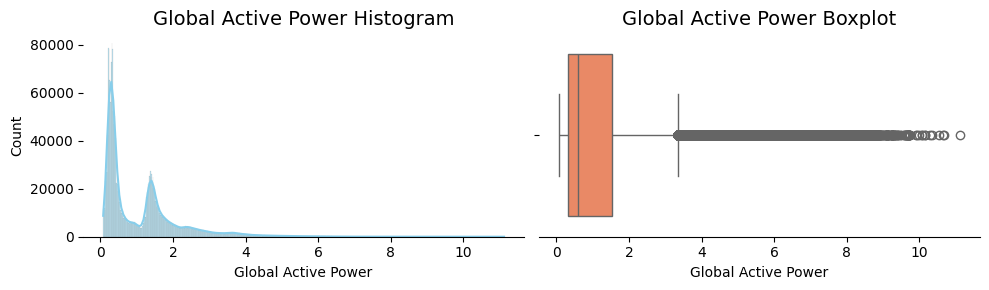

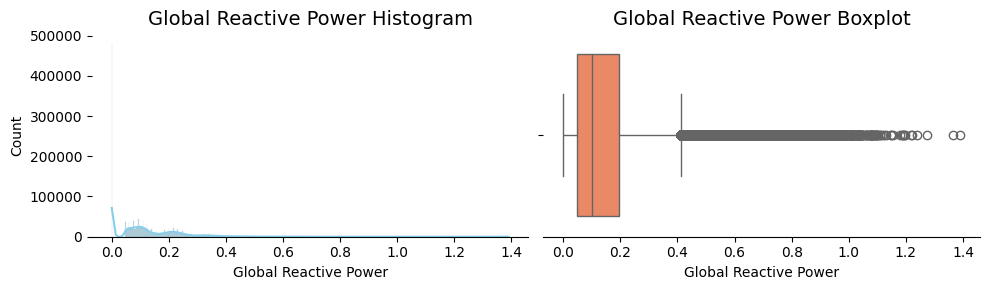

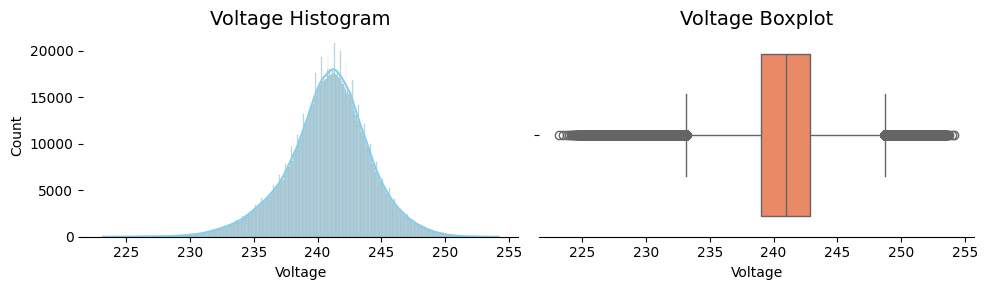

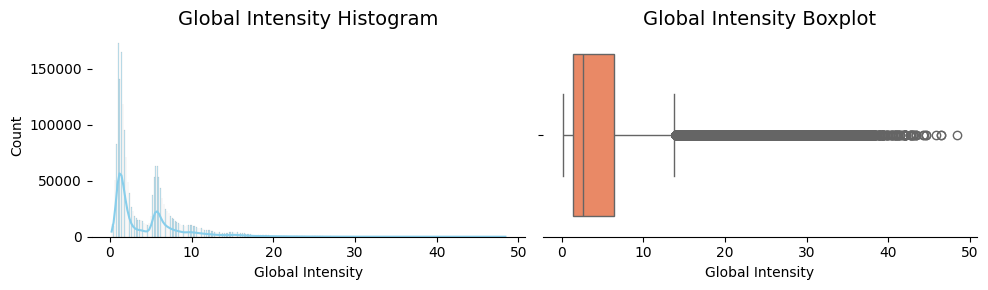

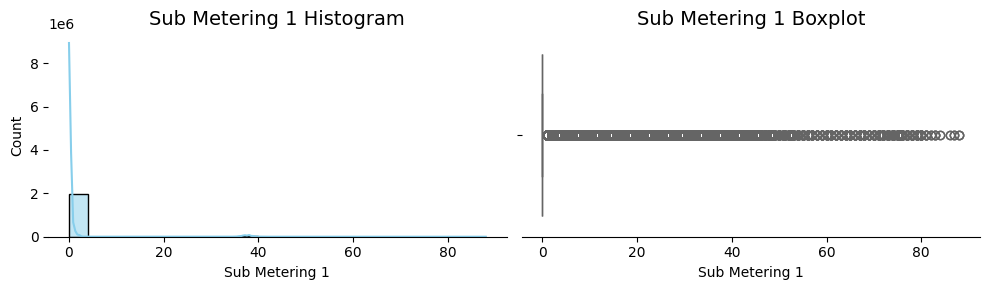

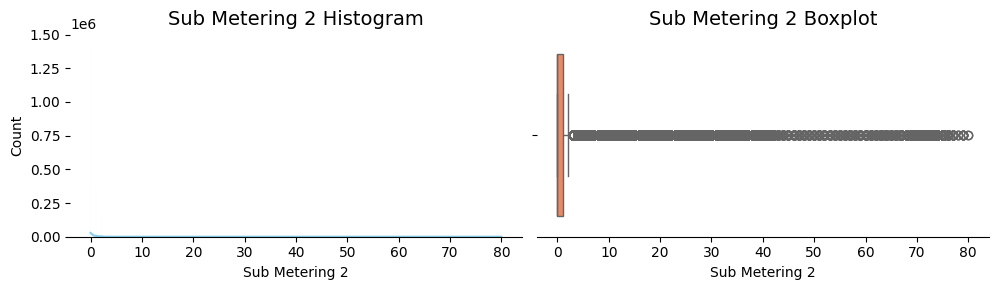

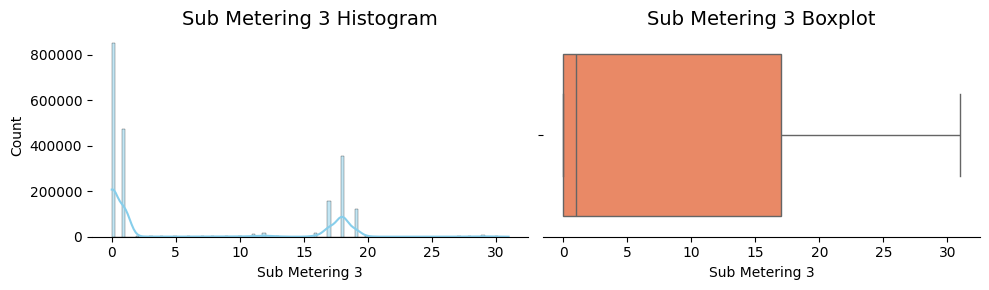

In [ ]:
#Plot distribution of numerical variables
def plot_distribution(data, column):
    f, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)  #one plot for histogram and the other for boxplot

    # Histogram or Countplot
    ax1 = sns.histplot(data, x=column , color="skyblue", ax=axes[0], kde=True)
    sns.despine(top=True, right=True, left=True)
    ax1.set_title(f'{column} Histogram', fontsize=14)

    # Boxplot
    ax2 = sns.boxplot(x=column, data=data, ax=axes[1], color="coral")
    ax2.set_title(f'{column} Boxplot', fontsize=14)
    plt.tight_layout()

    filename = column.lower().replace(" ", "_")
    plt.savefig(f'results/{filename}_distribution.png', transparent=True)

    plt.show()


for variable in num_cols:
    plot_distribution(df, variable)

From the previous plots, we can observe that ...

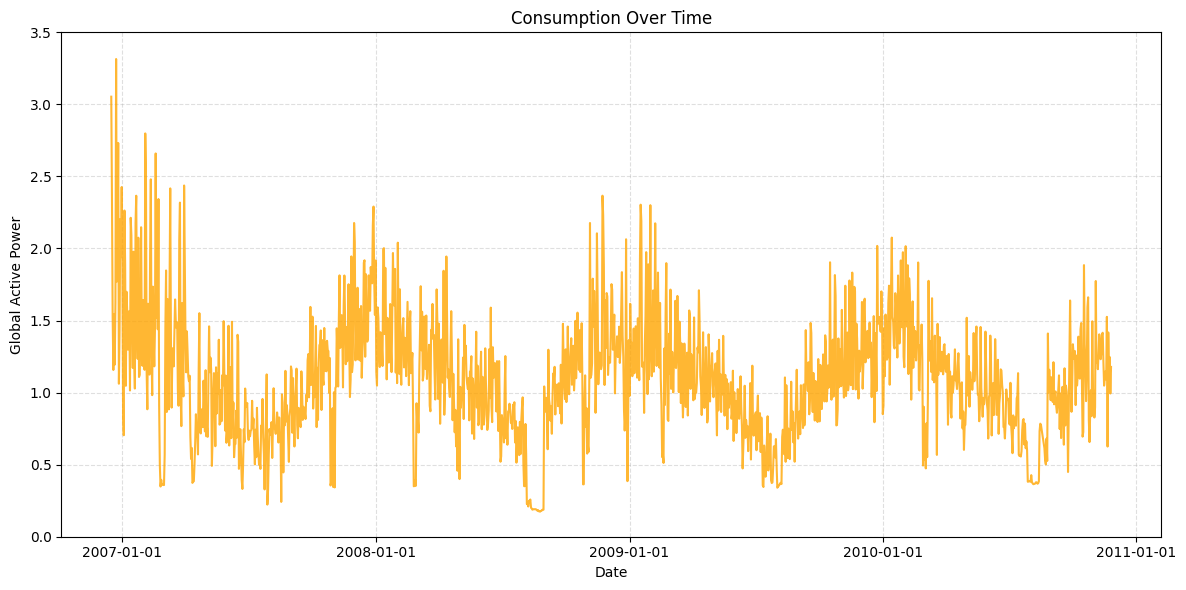

In [ ]:
import matplotlib.dates as mdates

consumption = df.groupby('Date')['Global Active Power'].mean()

plt.figure(figsize=(12, 6))
plt.style.use('default')

consumption.plot(alpha=0.8, color='orange')
plt.title('Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power')

# Format the x-axis to only show the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.ylim(0, 3.5)
plt.xticks(rotation=0, ha='center')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig('consumption_through_years.png', transparent=True)

plt.show()

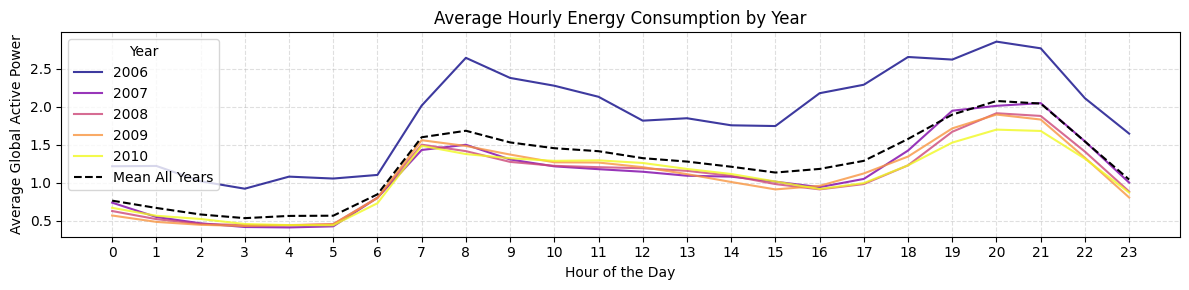

In [ ]:
df['Hour'] = df['Datetime'].dt.hour
df['Year'] = df['Datetime'].dt.year

hourly_by_year = df.groupby(['Hour', 'Year'])['Global Active Power'].mean().unstack()
hourly_mean_all_years = hourly_by_year.mean(axis=1)

# Plot
cmap = plt.get_cmap('plasma', hourly_by_year.shape[1])  # One color per year
colors = [cmap(i) for i in range(hourly_by_year.shape[1])]

plt.figure(figsize=(12, 3))
plt.style.use('default')
for idx, year in enumerate(hourly_by_year.columns):
    plt.plot(hourly_by_year.index, hourly_by_year[year], color=colors[idx], label=str(year), alpha=0.8)
plt.plot(hourly_mean_all_years.index, hourly_mean_all_years.values, linestyle='--', color='black', label='Mean All Years')

plt.title('Average Hourly Energy Consumption by Year')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig('hourly_consumption.png', transparent=True)

plt.show()

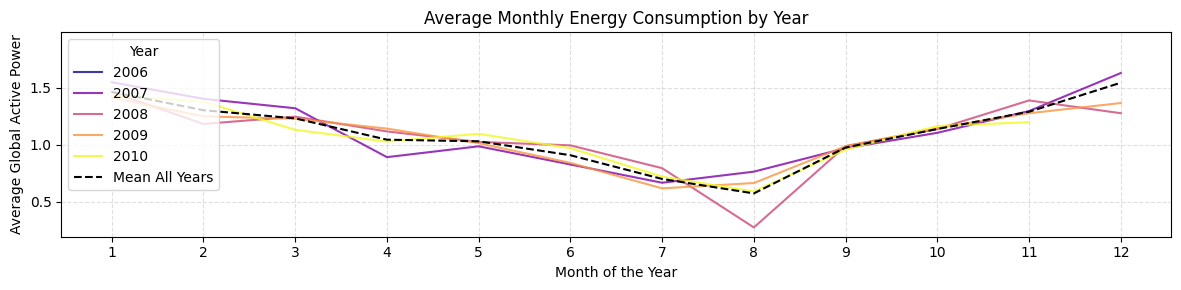

In [ ]:
df['Month'] = df['Datetime'].dt.month

monthly_by_year = df.groupby(['Month', 'Year'])['Global Active Power'].mean().unstack()
monthly_mean_all_years = monthly_by_year.mean(axis=1)

# Plot
cmap = plt.get_cmap('plasma', monthly_by_year.shape[1])  # One color per year
colors = [cmap(i) for i in range(monthly_by_year.shape[1])]

plt.figure(figsize=(12, 3))
plt.style.use('default')
for idx, year in enumerate(monthly_by_year.columns):
    plt.plot(monthly_by_year.index, monthly_by_year[year], color=colors[idx], label=str(year), alpha=0.8)
plt.plot(monthly_mean_all_years.index, monthly_mean_all_years.values, linestyle='--', color='black', label='Mean All Years')

plt.title('Average Monthly Energy Consumption by Year')
plt.xlabel('Month of the Year')
plt.ylabel('Average Global Active Power')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig('monthly_consumption.png', transparent=True)

plt.show()

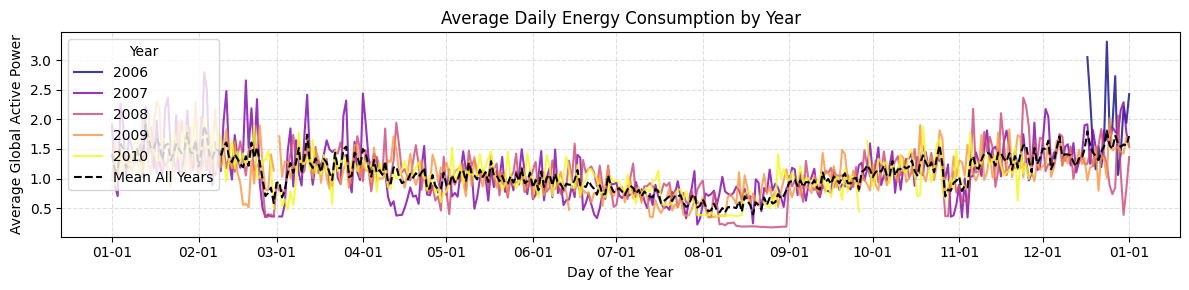

In [ ]:
df['Month-Day'] = df['Datetime'].dt.strftime('%m-%d')

daily_by_year = df.groupby(['Month-Day', 'Year'])['Global Active Power'].mean().unstack()
daily_mean_all_years = daily_by_year.mean(axis=1)

# Plot
cmap = plt.get_cmap('plasma', daily_by_year.shape[1])  # One color per year
colors = [cmap(i) for i in range(daily_by_year.shape[1])]

plt.figure(figsize=(12, 3))
plt.style.use('default')
for idx, year in enumerate(daily_by_year.columns):
    plt.plot(daily_by_year.index, daily_by_year[year], color=colors[idx], label=str(year), alpha=0.8)
plt.plot(daily_mean_all_years.index, daily_mean_all_years.values, linestyle='--', color='black', label='Mean All Years')

plt.title('Average Daily Energy Consumption by Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Global Active Power')
plt.legend(title='Year', loc='upper left')

# Format the x-axis to only show the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig('daily_consumption.png', transparent=True)

plt.show()

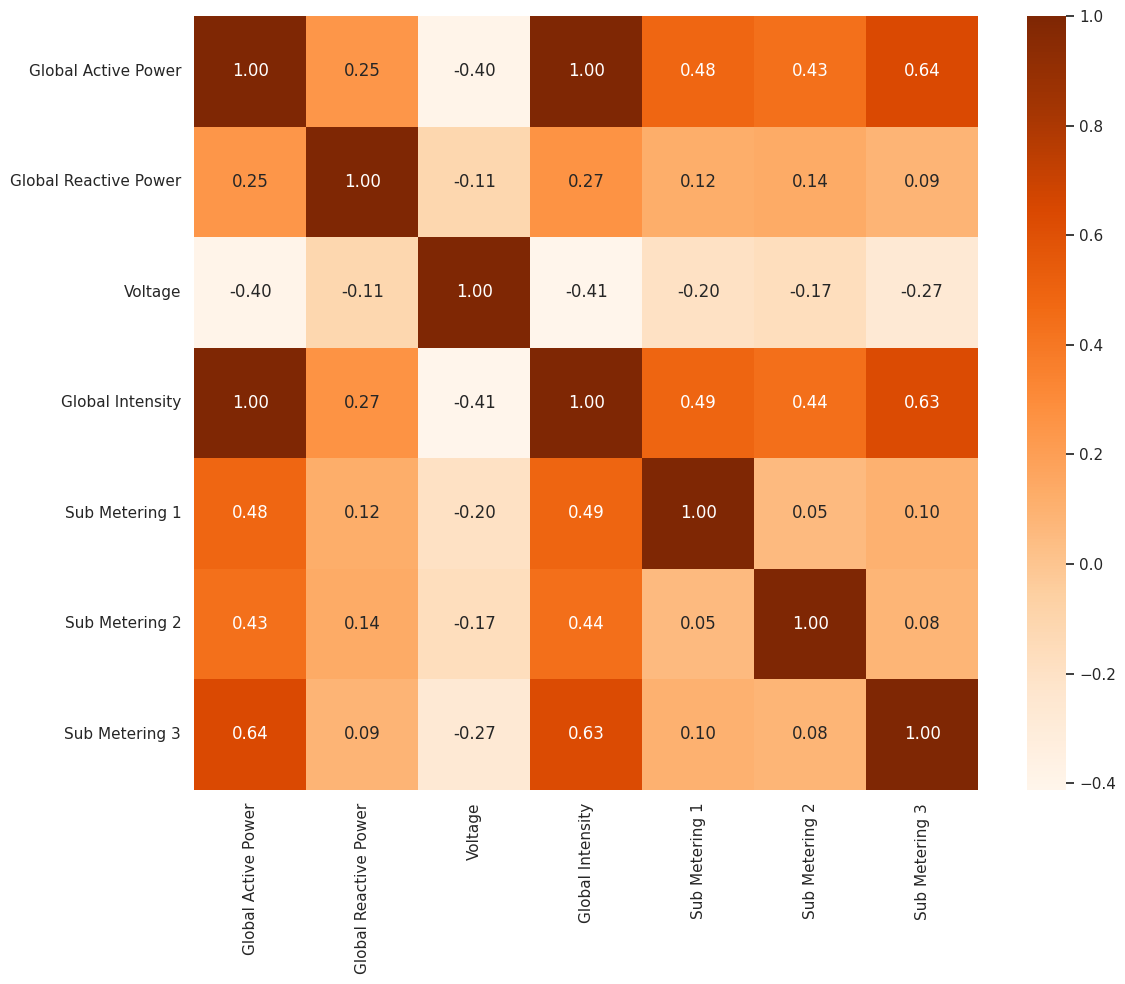

In [ ]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 10))
# sns.set(rc = {'figure.figsize':(12, 10)})
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Oranges", cbar=True)
plt.tight_layout()  # This ensures nothing gets cut off

plt.savefig('correlation.png', transparent=True)

plt.show()

### 2.3. Export
Cell to download preproceseed dataset.

In [ ]:
# df.to_csv("clean_dataset.csv", index=False)